<a href="https://colab.research.google.com/github/Nisarg111/RNN-Stock-Predictor/blob/main/Tesla_Stock_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [2]:
#Creating Ticker

tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period = 'max')
tesla_data.reset_index(inplace = True)


In [3]:
#Create The required dataset

tesla_data_set_required = tesla_data.filter(['Date', 'High'])
tesla_data_set_required.head()

,Date,High
0,2010-06-29 00:00:00-04:00,1.666667
1,2010-06-30 00:00:00-04:00,2.028000
2,2010-07-01 00:00:00-04:00,1.728000
3,2010-07-02 00:00:00-04:00,1.540000
4,2010-07-06 00:00:00-04:00,1.333333


In [4]:
# Splitting the dataset

tesla_train = tesla_data_set_required[tesla_data_set_required['Date']<'2022-01-01']
tesla_test = tesla_data_set_required[tesla_data_set_required['Date']>'2022-01-01']
tesla_test.head()

,Date,High
2899,2022-01-03 00:00:00-05:00,400.356659
2900,2022-01-04 00:00:00-05:00,402.666656
2901,2022-01-05 00:00:00-05:00,390.113342
2902,2022-01-06 00:00:00-05:00,362.666656
2903,2022-01-07 00:00:00-05:00,360.309998


In [5]:
# Setting up the index
tesla_train.set_index('Date',inplace=True)
tesla_test.set_index('Date',inplace=True)
tesla_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2899 entries, 2010-06-29 00:00:00-04:00 to 2021-12-31 00:00:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    2899 non-null   float64
dtypes: float64(1)
memory usage: 45.3 KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
training_data_scaled = sc.fit_transform(tesla_train)
training_data_scaled

array([[0.00134982],
       [0.0022239 ],
       [0.00149819],
       ...,
       [0.88752293],
       [0.88070928],
       [0.86978331]])

In [7]:
# Setting up the input for the model

x_train_list=[]
y_train_list=[]

for i in range(60,len(training_data_scaled)):
    x_train_list.append(training_data_scaled[i-60:i,0])
    y_train_list.append(training_data_scaled[i,0])


In [8]:
temp = np.array(x_train_list)
temp.shape[0]

2839

In [9]:
# Data reshape is required because karas takes 3D input
# Karas takes a sequence of 3D point clouds as input. Each point cloud in the sequence represents a different time step.
# The LSTM processes the sequence of point clouds one at a time. At each time step, the LSTM learns the relationships between the points in the current point cloud and the points in the previous point clouds.
# The LSTM uses this information to generate a new 3D point cloud. This point cloud represents the predicted state of the object at the current time step.
# The process is repeated until Karas has generated the desired number of 3D point clouds.

x_train_list, y_train_list = np.array(x_train_list),np.array(y_train_list)
x_train_list = np.reshape(x_train_list,(x_train_list.shape[0],x_train_list.shape[1],1))


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()

In [12]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_list.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [13]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
regressor.fit(x_train_list, y_train_list, epochs=100, batch_size=32)

Epoch 1/100
89/89 [==============================] - 23s 169ms/step - loss: 0.0037
Epoch 2/100
89/89 [==============================] - 13s 142ms/step - loss: 0.0016
Epoch 3/100
89/89 [==============================] - 12s 139ms/step - loss: 0.0012
Epoch 4/100
89/89 [==============================] - 22s 252ms/step - loss: 0.0012
Epoch 5/100
89/89 [==============================] - 10s 117ms/step - loss: 0.0014
Epoch 6/100
89/89 [==============================] - 12s 129ms/step - loss: 0.0011
Epoch 7/100
89/89 [==============================] - 12s 130ms/step - loss: 8.0409e-04
Epoch 8/100
89/89 [==============================] - 12s 130ms/step - loss: 8.9368e-04
Epoch 9/100
89/89 [==============================] - 12s 137ms/step - loss: 9.7766e-04
Epoch 10/100
89/89 [==============================] - 12s 130ms/step - loss: 9.1220e-04
Epoch 11/100
89/89 [==============================] - 11s 118ms/step - loss: 7.5107e-04
Epoch 12/100
89/89 [==============================] - 13s 142ms/s

In [ ]:
tesla_train.iloc[-60:,0]

Date
2021-10-07 00:00:00-04:00    268.333344
2021-10-08 00:00:00-04:00    265.459991
2021-10-11 00:00:00-04:00    267.079987
2021-10-12 00:00:00-04:00    270.773346
2021-10-13 00:00:00-04:00    271.803345
2021-10-14 00:00:00-04:00    273.416656
2021-10-15 00:00:00-04:00    281.070007
2021-10-18 00:00:00-04:00    291.753326
2021-10-19 00:00:00-04:00    292.649994
2021-10-20 00:00:00-04:00    289.829987
2021-10-21 00:00:00-04:00    300.000000
2021-10-22 00:00:00-04:00    303.333344
2021-10-25 00:00:00-04:00    348.339996
2021-10-26 00:00:00-04:00    364.980011
2021-10-27 00:00:00-04:00    356.959991
2021-10-28 00:00:00-04:00    360.333344
2021-10-29 00:00:00-04:00    371.736664
2021-11-01 00:00:00-04:00    403.250000
2021-11-02 00:00:00-04:00    402.863342
2021-11-03 00:00:00-04:00    405.130005
2021-11-04 00:00:00-04:00    414.496674
2021-11-05 00:00:00-04:00    413.290009
2021-11-08 00:00:00-05:00    399.000000
2021-11-09 00:00:00-05:00    391.500000
2021-11-10 00:00:00-05:00    359.36

In [ ]:
tesla_test.iloc[:,0]


Date
2022-01-03 00:00:00-05:00    400.356659
2022-01-04 00:00:00-05:00    402.666656
2022-01-05 00:00:00-05:00    390.113342
2022-01-06 00:00:00-05:00    362.666656
2022-01-07 00:00:00-05:00    360.309998
                                ...    
2024-05-28 00:00:00-04:00    178.250000
2024-05-29 00:00:00-04:00    178.149994
2024-05-30 00:00:00-04:00    182.669998
2024-05-31 00:00:00-04:00    180.320007
2024-06-03 00:00:00-04:00    182.639999
Name: High, Length: 607, dtype: float64

In [15]:
# Preparing test inputs
t1 = tesla_train.iloc[-60:,0].values
t2 = tesla_test.iloc[:,0].values
inputs = np.append(t1,t2)
inputs.shape[0]

668

In [16]:

inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

In [ ]:
np.isnan(inputs).any()
inputs.shape[0]

667

In [17]:
x = []
y= []

for i in range(60,inputs.shape[0]):
    x.append(inputs[i-60:i,0])
    y.append(inputs[i,0])

y[1]

0.9609243697055452

In [22]:
x = np.array(x)
y = np.array(y)

y= y.reshape(-1,1)
x = np.reshape(x,(x.shape[0],x.shape[1],1))

predicted_values = regressor.predict(x)
predicted_values = sc.inverse_transform(predicted_values)
y = sc.inverse_transform(y)




19/19 [==============================] - 1s 45ms/step


In [24]:
for i in range(20):
  print(y[i],predicted_values[i])

[400.35665894] [372.08917]
[402.66665649] [383.4487]
[390.11334229] [390.13126]
[362.66665649] [390.52835]
[360.30999756] [381.01346]
[353.0333252] [373.78342]
[358.6166687] [365.07343]
[371.61334229] [361.9149]
[371.8666687] [365.90826]
[350.66665649] [370.65396]
[356.92999268] [366.8213]
[351.55667114] [366.81656]
[347.22000122] [363.95776]
[334.8500061] [360.8037]
[311.17001343] [354.00217]
[317.08666992] [341.0924]
[329.23001099] [332.50684]
[311.79666138] [331.15613]
[285.83334351] [326.8946]
[312.66333008] [315.58588]


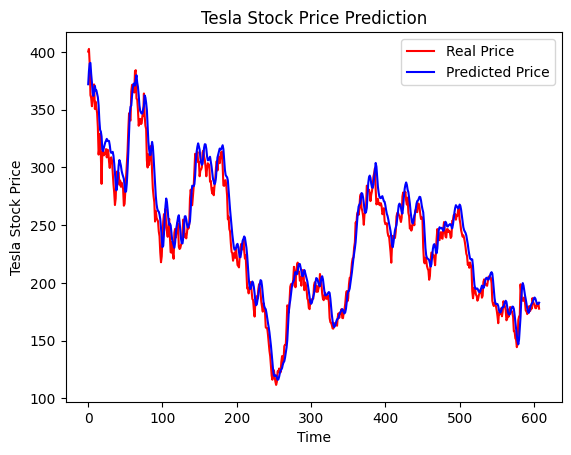

In [23]:
plt.plot(y, color='red',label='Real Price')
plt.plot(predicted_values,color='blue',label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()